# Project Foundations for Data Science: Food Delivery Service Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [3]:
# Calculate number of rows
rows = df.shape[0]
rows

1898

In [4]:
# Calculate number of columns
columns = df.shape[1]
columns

9

#### Observations:
There are 1898 rows and 9 columns in the dataset.

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There is only one variable with a float data type, cost_of_the_order. 
- There are four variables that have an object data type. These variables are: restaurant_name, cuisine_type, day_of_the_week, and rating.
- There are four variables that have an integer data type. These variables are: order_id, customer_id, food_preparation_time, and delivery_time. 

In [6]:
# Sum the number of null values per variable
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

<AxesSubplot:>

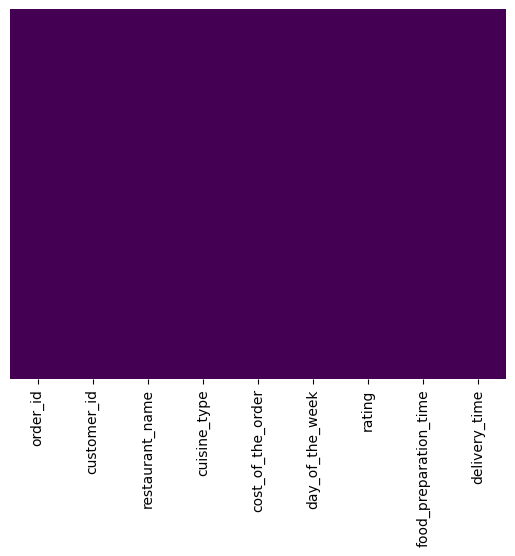

In [7]:
# Visualize if there are any missing values in the data
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

#### Observations:
No, there are not any missing values in the data.

In [8]:
# describe dataframe
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


Once an order is placed, the minimum time it takes to prepare an order is 20 minutes, the maximum time it takes is 35 minutes, and the average is 27 minutes.

#### Observations:

restaurant_name variable:

    - There are 178 unique restaurant names
    - The most popular restaurant name is Shake Shack. It has 219 occurrences

cuisine_type variable:

    - There are 14 unique cuisine types.
    - The most popular cuisine type is American. It has 584 occurrences.

day_of_the_week variable:

    - There are only two unique values, weekday and weekend.
    - The most popular one is Weekend. It has 1351 occurrences.

rating variable:

    - There are 4 unique types of rating.
    - The most popular rating is "Not given"

cost_of_the_order variable:

    - The average cost of an order is 16.50
    - The lowest cost of an order is 4.47
    - The highest cost f an order is 35.41
    - The standard deviation is 7.48. This means that 68% of observations fall within the range of 9.02 and 23.98

food_preparation_time variable:

    - The average time it took to prepare the food was 27 minutes
    - The shortest time it took to prepare the food was 20 minutes
    - The longest time it took to prepare the food was 35 minutes
    - The standard deviation is approximately 5 minutes. This means that 68% of observations fall within the range of 22 minutes and 32 minutes
    
delivery_time variable:

    - The average time it took for an order to be delivered was 24 minutes
    - The shortest time it took for an order to be delivered was 15 minutes
    - The longest time it took for an order to be delivered was 33 minutes
    - The standard deviation is approximately 5 minutes. This means that 68% of observations fall within the range of 19 minutes and 29 minutes.
    

In [9]:
# Write the code here
df.groupby('rating')['order_id'].count().to_frame()

,order_id
rating,
3,188
4,386
5,588
Not given,736


#### Observations:
There are 736 orders that do not have a rating. They have a "Not given" label.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

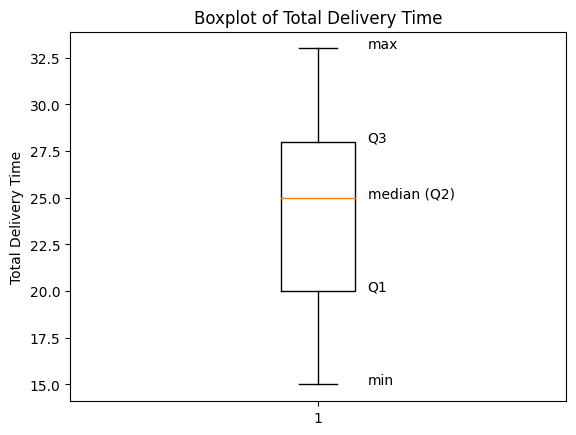

In [11]:
# plot a distribution of total delivery_time 
plt.boxplot(df['delivery_time'])

# add labels for five number summary
plt.text(x = 1.1, y = df['delivery_time'].min(), s ='min')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['delivery_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['delivery_time'].max(), s ='max')


# add the graph title and axes labels
plt.title('Boxplot of Total Delivery Time')
plt.ylabel('Total Delivery Time')

# display the plot
plt.show()

In the above plot I see that there are not any outliers. The median (Q2) is closer to Q3 than to Q1, which means data is negatively skewed.

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

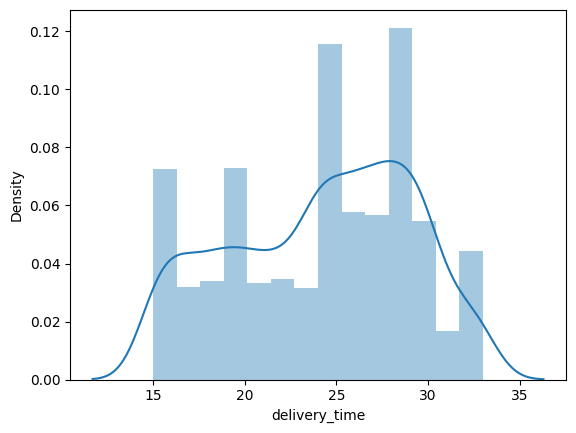

In [12]:
# Plot a distplot for delivery time, using a distplot
sns.distplot(df['delivery_time'])

In the above plot, I see that delivery_time data is negatively skewed and there is a large number of orders that were delivered between 28 and 29 minutes. 

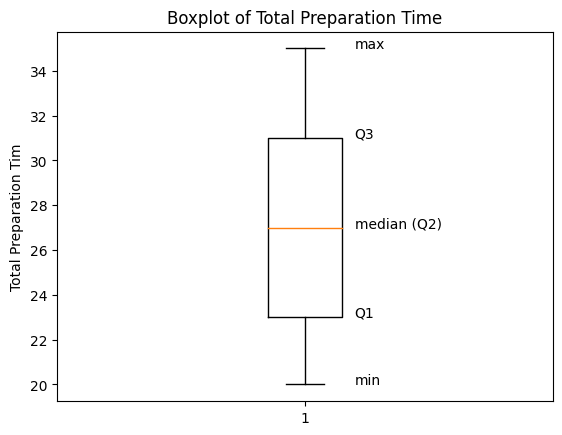

In [13]:
# plot a distribution of food_preparation_time
plt.boxplot(df['food_preparation_time'])

# add labels for five number summary
plt.text(x = 1.1, y = df['food_preparation_time'].min(), s ='min')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['food_preparation_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['food_preparation_time'].max(), s ='max')


# add the graph title and axes labels
plt.title('Boxplot of Total Preparation Time')
plt.ylabel('Total Preparation Tim')

# display the plot
plt.show()

In the above plot, I see that there are not any ouliers. The median appear to be at the same distance to Q1 and to Q2, which means that prepartion_time data is not skewed.

<AxesSubplot:xlabel='food_preparation_time', ylabel='Density'>

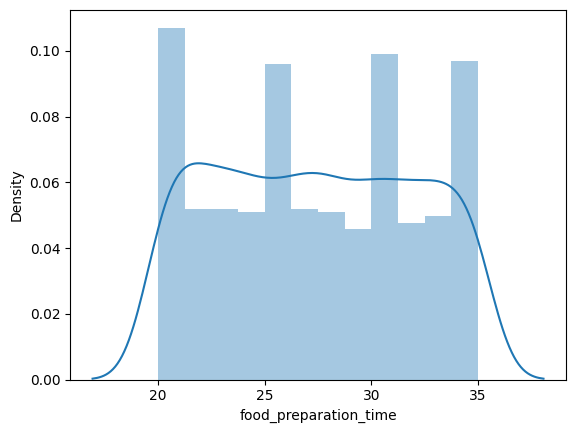

In [14]:
# plot a distribution of food_preparation_time, using a distplot
sns.distplot(df['food_preparation_time'])

In the above plot, I interpret that food_preparation_time data is not skewed and there is a large number of orders that were prepared in a range of 20 to 21 minutes.

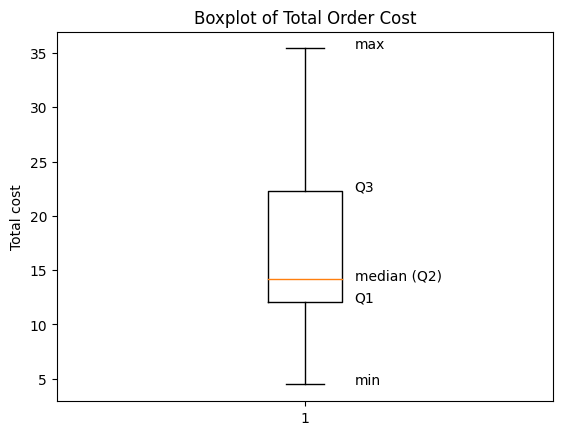

In [15]:
# plot a distribution of cost_of_the_order
plt.boxplot(df['cost_of_the_order'])

# add labels for five number summary
plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s ='max')


# add the graph title and axes labels
plt.title('Boxplot of Total Order Cost')
plt.ylabel('Total cost')

# display the plot
plt.show()

From the above plot, I see that the median is closer to Q1 than Q2, which means that cost_of_the_order data is positively skewed. I also see that there are not any outliers.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Density'>

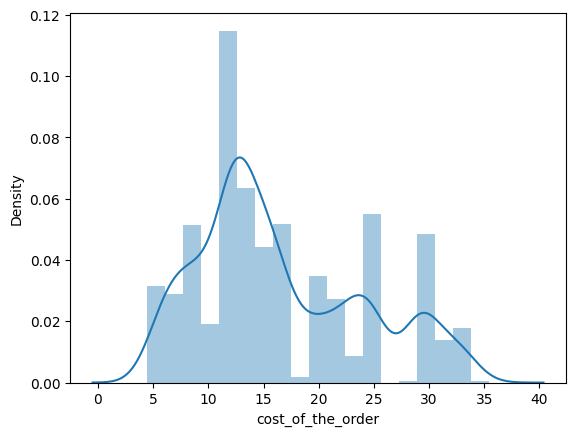

In [16]:
# plot a distribution of cost_of_the_order
sns.distplot(df['cost_of_the_order'])

In the above plot, I see that data is positively skewed and there is a  large number of orders that costed around 13 dollars.

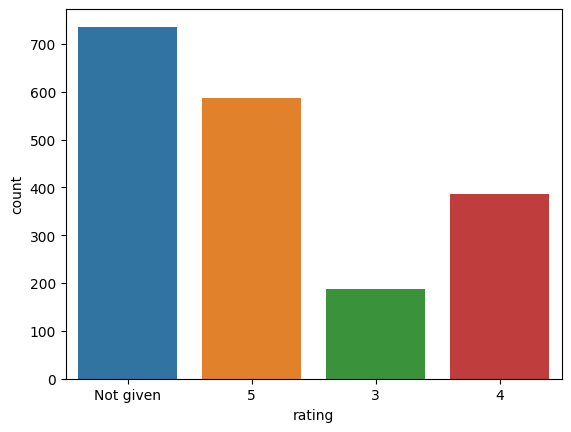

In [17]:
# plot a bar chart for rating
sns.countplot(data=df,x='rating')

# show plot
plt.show()

In the above plot, I see that the most popular rating is "Not given".

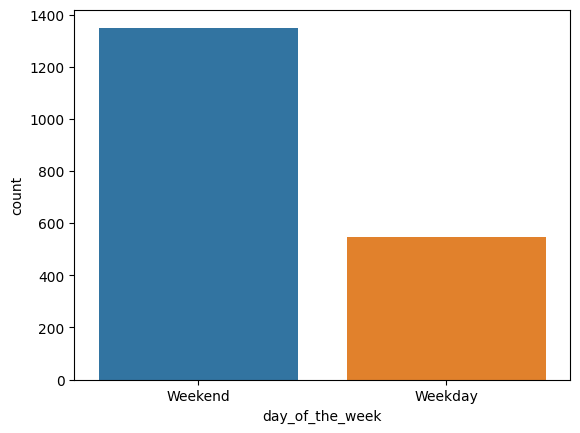

In [18]:
# plot a bar chart for day of the week
sns.countplot(data=df,x='day_of_the_week')

# show plot
plt.show()

In the above plot, I see that there are more orders made during the weekends than the weekdays.

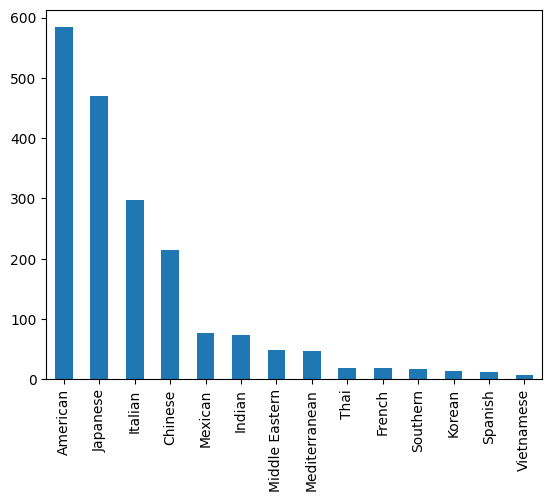

In [19]:
# plot a bar chart that counts cuisine type
df.cuisine_type.value_counts().plot(kind='bar',rot=90)

# show plot
plt.show()

In the above plot, I see that the most popular cuisine is American.

In [20]:
# Write the code here

# count the number of order ids by restaurant name and order the results in a descending order
df_q7 = df.groupby('restaurant_name')['order_id'].count().to_frame().sort_values(by='order_id',ascending=False)

# pick the top five
df_q7.iloc[:5]

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The above dataframe lists the top 5 restaurants in terms of ordres received. Additionally, in this list, I see that Shake Shack is the top.

In [21]:
# Write the code here

# filter dataframe to only have weekend as the day of the week
df_weekends = df[df['day_of_the_week']=='Weekend']

# count the order ids by cuisine type and order them descending
df_q8 = df_weekends.groupby('cuisine_type')['order_id'].count().to_frame().sort_values(by='order_id',ascending=False)

# pick the top one
df_q8.iloc[:1]

,order_id
cuisine_type,
American,415


#### Observations:
The most popular cuisine on weekends is American.

In [22]:
# Write the code here

# get total number of rows of dataframe
all_df = df.shape[0]

# filter dataframe to only have records that have an order that costed more than $20 and get the number of rows of the resulting dataframe
filtered_df = df[df['cost_of_the_order']>20.00].shape[0]

# calculate th percentage of orders that cost more than 20 dollars
percentage = filtered_df/all_df*100

# print result
print(format(percentage,'.2f'))

29.24


#### Observations:
There is a 29.24% of orders that cost more than 20 dollars.

In [23]:
# Write the code here

# calculate the mean order delivery time
print(format(df['delivery_time'].mean(),'.2f'))

24.16


#### Observations:
The mean order delivery time is 24.16.

In [24]:
# Write the code here

# count the number of orders by customer and order the results descending
df_q11 = df.groupby('customer_id')['order_id'].count().to_frame().sort_values(by='order_id',ascending=False)

# pick the top three results
df_q11.iloc[:3]

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The customer_ids of the top 3 most frequent customers is listed in the above dataframe.

### Multivariate Analysis

<AxesSubplot:>

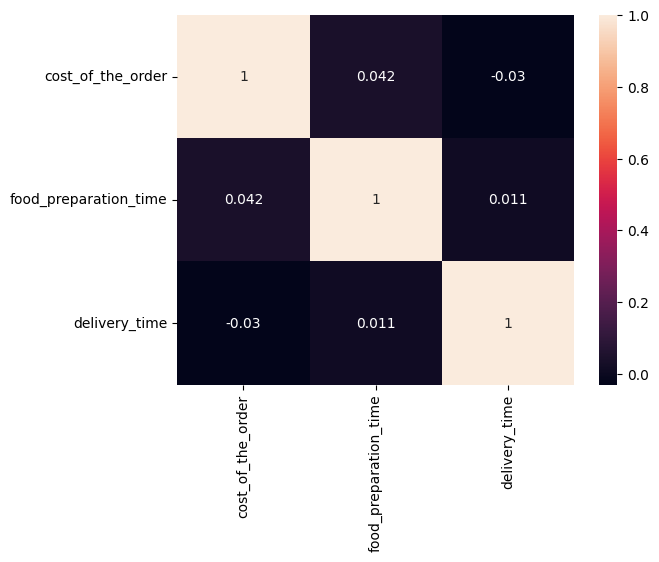

In [25]:
# Write the code here

# remove ordre ids and customer ids
df_without_ids = df.drop(['order_id','customer_id'],axis=1)

# calculate correlation
correlation = df_without_ids.corr()

# plot the correlation using a heatmap
sns.heatmap(correlation, annot=True)

In the above plot, I see that there is a slight:
 - positive relationship between the cost of the order and the food preparation time.
 - positive relationship between the food preparation time and the delivery time.
 - negative relationship between the cost of the order and the delivery time. 

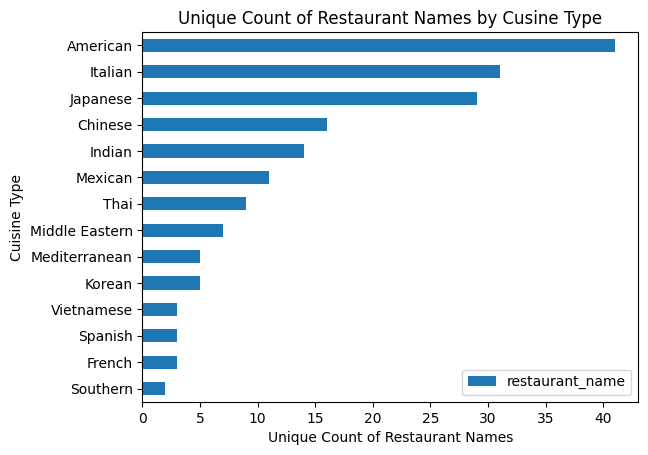

In [26]:
# count the number of unique restaurant names by cuisine type and plot result in a horizontal bar chart
df.groupby('cuisine_type')['restaurant_name'].nunique().to_frame().sort_values(by='restaurant_name').plot.barh()

# assign label and titles to plot
plt.title('Unique Count of Restaurant Names by Cusine Type')
plt.xlabel('Unique Count of Restaurant Names')
plt.ylabel('Cuisine Type')

# show plot
plt.show()

In the above plot, I see that there is a greater number of restaurants names that offer American cuisine.

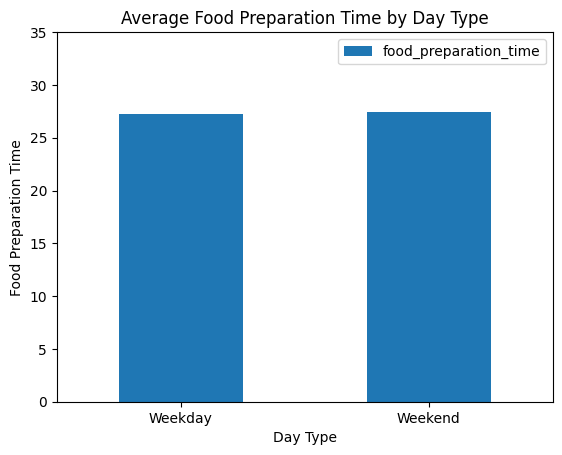

In [27]:
# find the mean of the food preparation time by day of the week and plot in a bar chart
df.groupby('day_of_the_week')['food_preparation_time'].mean().to_frame().plot(kind='bar')

# rotate x labels to display horizontally
plt.xticks(rotation=0)

# set y axis limit
plt.ylim(0,35)

# assign title and labels to plot
plt.title('Average Food Preparation Time by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Food Preparation Time')

# show plot
plt.show()

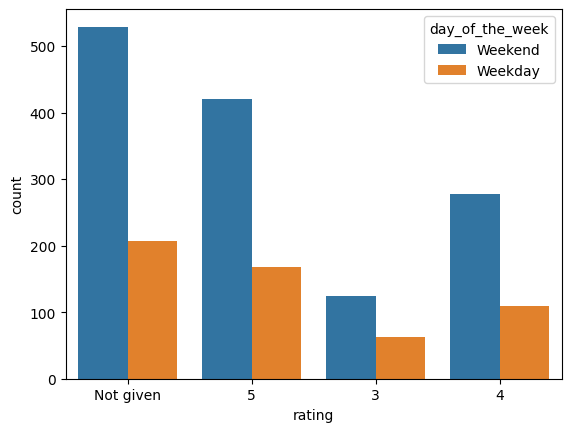

In [28]:
# grouped bar chart of count of ratings by day of the week
sns.countplot(data = df, x = 'rating', hue = 'day_of_the_week')

# show plot
plt.show()

In the above plot, I see that more ratings are given during the weekend than during the weekdays. The greatest count of rating is "Not given". The second largest count of rating is 5. 

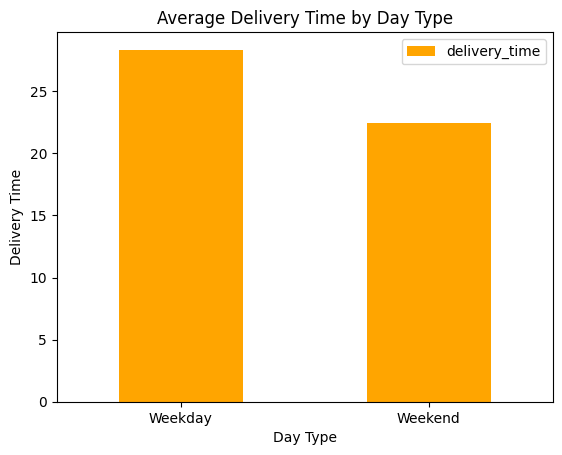

In [29]:
# calculate mean of delivery time by day of the mean and plot it a bar chart
df.groupby('day_of_the_week')['delivery_time'].mean().to_frame().plot(kind='bar',color='orange')

# rotate x axis labels
plt.xticks(rotation=0)

# assign title and labels to plot
plt.title('Average Delivery Time by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Delivery Time')

# show plot
plt.show()

In the above plot, I see that the average delivery time is greater during the weekdays. 

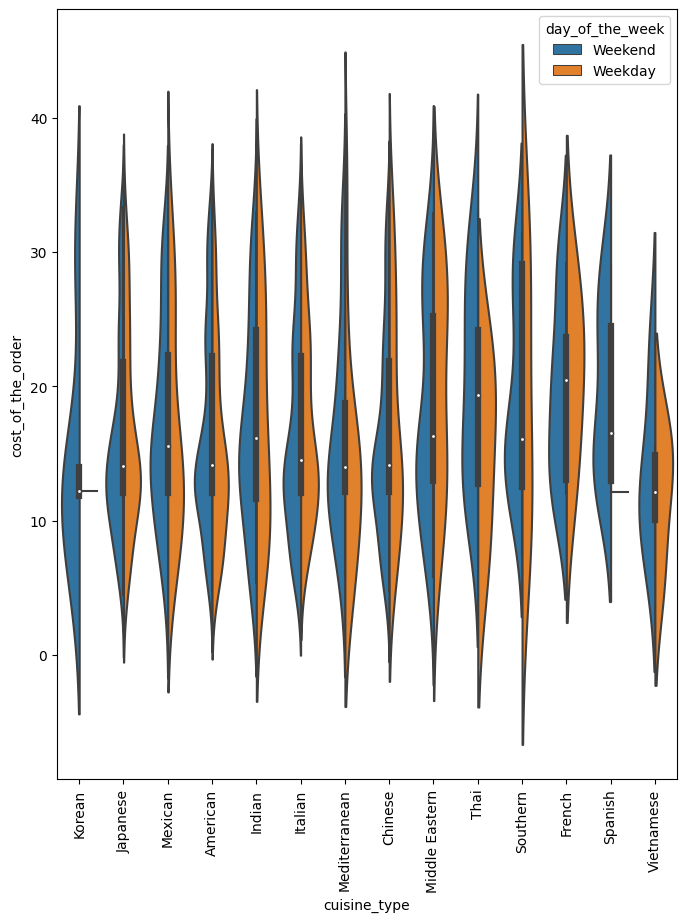

In [30]:
# set figure size
plt.figure(figsize = (8,10))

# violin plot
sns.violinplot(y = 'cost_of_the_order', x = 'cuisine_type', data = df, hue = 'day_of_the_week', split = True)

# rotate x axis labels
plt.xticks(rotation=90)

# show plot
plt.show()

From the above chart, I can highlight that the Spanish and Korean cuisine don't have orders during the weekdays. Besides this, the distribution of cost of orders and type of day for the other types of cuisine does not vary significantly.

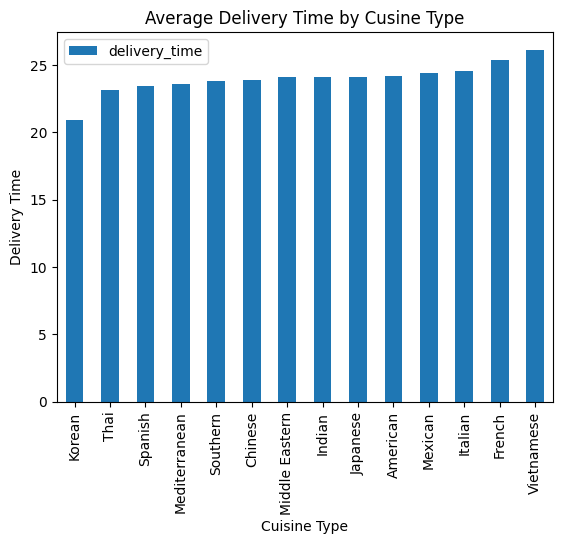

In [31]:
# calculate mean of delivery time by cuisine type and plot it in a bar chart
df.groupby('cuisine_type')['delivery_time'].mean().to_frame().sort_values(by='delivery_time').plot(kind='bar')

# assign title and labels to plot
plt.title('Average Delivery Time by Cusine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')

# show plot
plt.show()

In the above plot, I see that Vietnamese cuisine on average takes the longest to deliver.

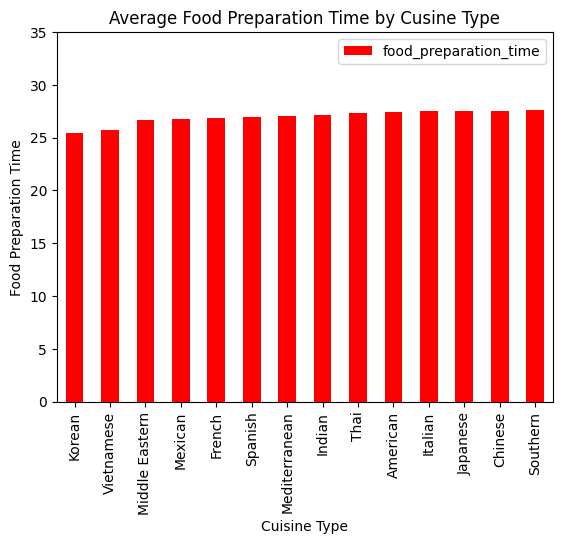

In [32]:
# calculate mean of food preparation time by cuisine type and plot it in a bar chart
df.groupby('cuisine_type')['food_preparation_time'].mean().to_frame().sort_values(by='food_preparation_time').plot(kind='bar',color='red')

# set limit for y axis
plt.ylim(0,35)

# assign title and labels to plot
plt.title('Average Food Preparation Time by Cusine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')

# show plot
plt.show()

In the above plot, I see that the average food preparation time is very similar among the different cuisine types.

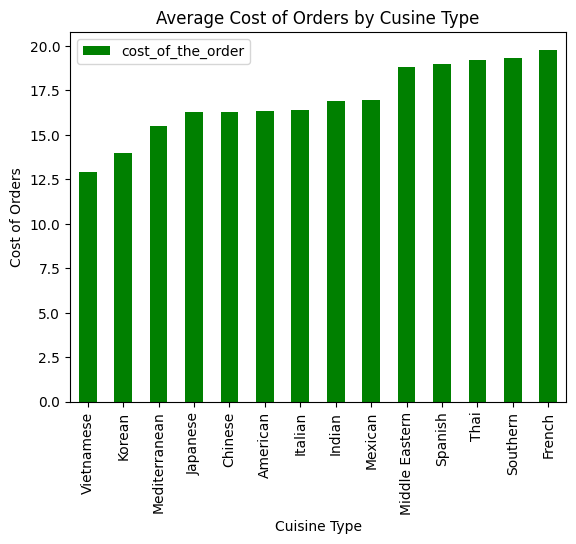

In [33]:
# calculate mean of the cost of orders by cuisine type and plot it in a bar chart
df.groupby('cuisine_type')['cost_of_the_order'].mean().to_frame().sort_values(by='cost_of_the_order').plot(kind='bar',color='green')

# assign title and labels to plot
plt.title('Average Cost of Orders by Cusine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Orders')

# show plot
plt.show()

In the above plot, I interpret that on average French cuisine is the most costly.

In [34]:
# count ratings by restaurant name and sort them descending
rating_cnt_df = df.groupby('restaurant_name')['rating'].count().to_frame().sort_values(by='rating',ascending=False)

# filter dataframe to have only ratings with a count of higher than 50
rating_cnt_filtered = rating_cnt_df[rating_cnt_df['rating']>50]

# rename columns
rating_cnt_filtered.rename(columns={'rating':'rating count'},inplace=True)

# show dataframe
rating_cnt_filtered

,rating count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55


In [35]:
# remove non-numeric ratings before calculating mean
numeric_ratings = df[df['rating']!='Not given']

# convert ratings to integers
numeric_ratings['rating'] = numeric_ratings['rating'].astype('int')

# calculate mean of ratings by restaurant name
rating_avg_df = numeric_ratings.groupby('restaurant_name')['rating'].mean().round(2).to_frame()

# filter dataframe to only have ratings higher than 4
rating_avg_filtered = rating_avg_df[rating_avg_df['rating'] > 4]

# rename columns
rating_avg_filtered.rename(columns={'rating':'rating avg'},inplace=True)

# show dataframe
rating_avg_filtered

,rating avg
restaurant_name,
'wichcraft,5.00
12 Chairs,4.50
67 Burger,5.00
Amma,4.50
Anjappar Chettinad,5.00
...,...
Yama 49,5.00
Yama Japanese Restaurant,4.50
da Umberto,5.00


In [36]:
# merge dataframes on index
dfs_filtered = pd.merge(rating_cnt_filtered,rating_avg_filtered,left_index=True,right_index=True) 

# show resulting dataframe
dfs_filtered

,rating count,rating avg
restaurant_name,,
Shake Shack,219,4.28
The Meatball Shop,132,4.51
Blue Ribbon Sushi,119,4.22
Blue Ribbon Fried Chicken,96,4.33
Parm,68,4.13
RedFarm Broadway,59,4.24
RedFarm Hudson,55,4.18


In [37]:
# reset index of dataframe
dfs_filtered.reset_index()

,restaurant_name,rating count,rating avg
0,Shake Shack,219,4.28
1,The Meatball Shop,132,4.51
2,Blue Ribbon Sushi,119,4.22
3,Blue Ribbon Fried Chicken,96,4.33
4,Parm,68,4.13
5,RedFarm Broadway,59,4.24
6,RedFarm Hudson,55,4.18


In [38]:
# subset of dataframe
df_13 = df[['restaurant_name','cuisine_type']]

# show dataframe
df_13

,restaurant_name,cuisine_type
0,Hangawi,Korean
1,Blue Ribbon Sushi Izakaya,Japanese
2,Cafe Habana,Mexican
3,Blue Ribbon Fried Chicken,American
4,Dirty Bird to Go,American
...,...,...
1893,Chipotle Mexican Grill $1.99 Delivery,Mexican
1894,The Smile,American
1895,Blue Ribbon Sushi,Japanese
1896,Jack's Wife Freda,Mediterranean


In [39]:
# drop duplicates
restaurants_unique = df_13.drop_duplicates(subset='restaurant_name')

In [40]:
# right join dataframes on restaurant name
dfs_13_merged = pd.merge(restaurants_unique,dfs_filtered,on='restaurant_name',how='right') 

# show dataframe
dfs_13_merged

,restaurant_name,cuisine_type,rating count,rating avg
0,Shake Shack,American,219,4.28
1,The Meatball Shop,Italian,132,4.51
2,Blue Ribbon Sushi,Japanese,119,4.22
3,Blue Ribbon Fried Chicken,American,96,4.33
4,Parm,Italian,68,4.13
5,RedFarm Broadway,Chinese,59,4.24
6,RedFarm Hudson,Chinese,55,4.18


#### Observations:
The restaurant names that qualify for the promotional offer are listed in the above dataframe. Among this filtered list, Shake Shack has the highest number of ratings and The Meatball Shop has the highest rating. The restaurants that qualify for the promotion offer American, Chinese, Italian, and Japanese food. 

In [41]:
# define function to calculate revenue
def calc_revenue(x):
    if x > 5 and x <= 20:
        x *= 0.15
        return x
    elif x > 20:
        x *= 0.25
        return x
    else:
        x = 0.00
        return x

In [42]:
# make a copy of dataframe
df_q14 = df.copy()

# apply calc_revenue function and add new column to dataframe
df_q14['revenue'] = df_q14['cost_of_the_order'].apply(lambda x: calc_revenue(x))

In [43]:
# sum revenue column
df_q14['revenue'].sum()

6166.303

In [44]:
# sum revene by restaurant name and sort descending
df_q14.groupby('restaurant_name')['revenue'].sum().to_frame().sort_values(by='revenue',ascending=False)

,revenue
restaurant_name,
Shake Shack,703.6070
The Meatball Shop,419.8285
Blue Ribbon Sushi,360.4605
Blue Ribbon Fried Chicken,340.2035
Parm,218.5570
...,...
Market Table,1.0185
Wa Jeal,1.0110
Cipriani Le Specialita,0.8880


In [45]:
# sum revenue by cuisine type and sort descending
df_q14.groupby('cuisine_type')['revenue'].sum().to_frame().sort_values(by='revenue',ascending=False)

,revenue
cuisine_type,
American,1878.2740
Japanese,1478.2445
Italian,966.8845
Chinese,690.0405
Mexican,256.6930
Indian,246.9940
Middle Eastern,193.5535
Mediterranean,136.3280
Thai,78.0525


#### Observations:
The net revenue generated by the company across all orders is 6166.30 dollars. The cuisine type that generates the most revenue is American. The restaurant with the highest revenue is Shake Shack. 

In [46]:
# make a copyt of dataframe
df_q15 = df.copy()

# sum columns of dataframe and assign results to new column
df_q15['time_from_ordered_to_delivered'] = df['delivery_time']+df['food_preparation_time']

# filter dataframe to only have time greater than 60
df_q15_filtered = df_q15[df_q15['time_from_ordered_to_delivered']>60]

In [47]:
# calculate percentage and round it to two decimals
round(df_q15_filtered.shape[0]/df_q15.shape[0]*100,2)

10.54

#### Observations:
The percentage of orders that take more than 60 minutes to be delivered from the time the order is places is 10.54%. 

In [48]:
# calculate mean of delivery time by day of the week
mean_time_day_type = df.groupby('day_of_the_week')['delivery_time'].mean().to_frame()

# show dataframe
mean_time_day_type

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean delivery time during the weekday is higher than during the weekends.

### Conclusion and Recommendations

### Conclusions:
*  American cuisine generates the greatest revenue.
*  Delivery time takes longer during the weekdays than during the weekends.
*  Customers do not offer ratings often. When they do, they do it during the weekends. 
*  The greatest number of orders are placed on American restaurants. 
*  Shake Shack is the restaurant with the most orders.
*  The most popular cuisine during the weekend is American. 
*  There is a 29.24% of orders that cost more than 20 dollars.
*  On average, it takes 24 minutes for an order to be delivered.
*  Average food preparation time does not vary significantly from one cuisine to another.
*  Average food preparation time does not vary significantly during the weekends or the weekdays.
*  There is a slight difference between the delivery time from restaurants based on their cuisine type.
*  The most expensive cuisine on average is the French one. 
*  There is a 10% of orders that take more than 60 minutes from the time the order is place to the time customers receive their order.


### Recommendations:
* To increase revenue, offer a rewards program for all restaurants that offer American food.
* To improve customer experience, reduce delivery time during the weekdays. Look into why it takes longer to deliver during the weekdays. Take into account that food preparation time is not significantly different during the weekends or the weekdays. 
* Procure more data on ratings to get a better understanding on customer experience. Implement a program that rewards customers for giving a rating.

---